# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Exploratory Data Analysis (EDA)


The objective of this notebook is to present a brief exploratory data analysis (EDA) of the sampled dataset that will be later used.

In [3]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Part 1: Named Entities EDA

The Named Entities analysis was conducted during the dataset generation.
The distribution of named entity occurances, along with their corresponding labels, follows a heavy-tail distibution pattern, as can be seen below:

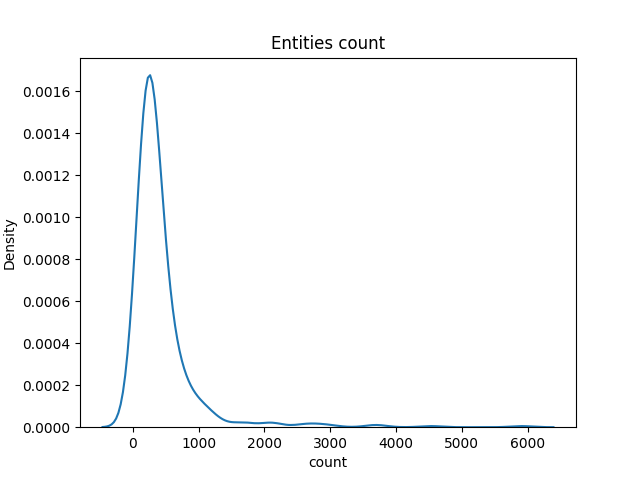

In [4]:
Image(filename='../part1/data_extractor_output/sampled_sentences_stats/entities_count.png')

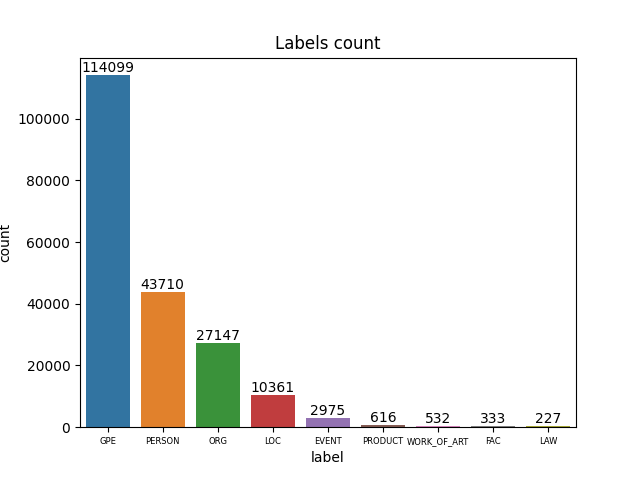

In [5]:
Image(filename='../part1/data_extractor_output/sampled_sentences_stats/labels_count.png')

We can see that Named-entities pairs follow a heavy-tail distibution as well:

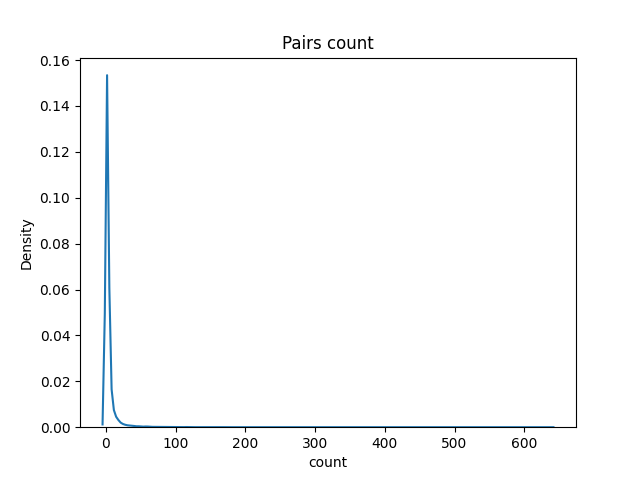

In [6]:
Image(filename='../part1/data_extractor_output/sampled_sentences_stats/pairs_count.png')

The occurrences of the paired labels can be visualized using a heatmap. For instance, it can be observed that pairs labeled as GPE-GPE (geopolitical entities) are the most common.

Other frequent combinations include: GPE-LOC (geopolitical entity - location), GPE-ORG (geopolitical entity - organization), GPE-PERSON, LOC-LOC (location - location), ORG-ORG (organization - organization), ORG-PERSON, and PERSON-PERSON.

Note: In this context, each pair is counted twice due to the symmetric nature of the relation. For example, a pair consisting of GPE and PERSON will be counted once as (GPE, PERSON) and then again as (PERSON, GPE).

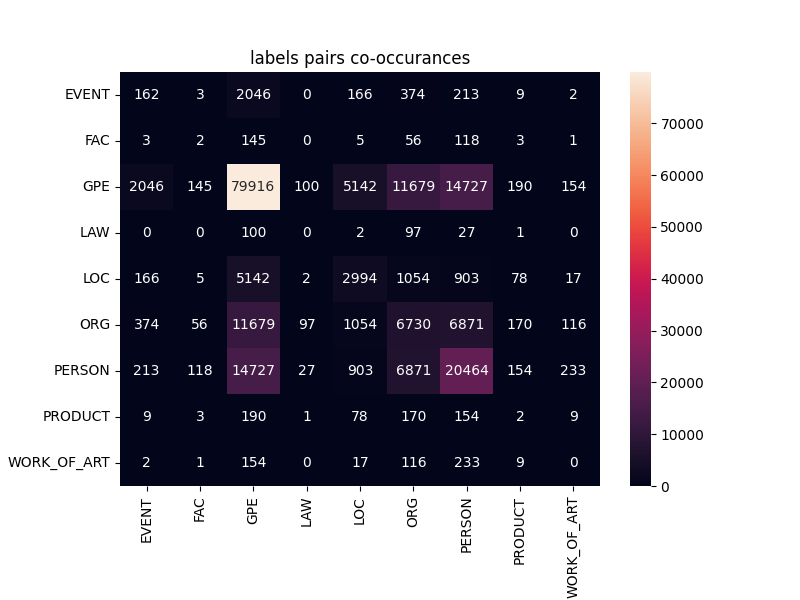

In [7]:
Image(filename='../part1/data_extractor_output/sampled_sentences_stats/pairs_labels_count.png')

## Part 3: Exploring the Mutual Information (MI) Score

### Exploring the MI for the entire dataset

The mutual information (MI) analysis also reveals a clear power-law distribution. It is apparent that lower MI values occur frequently, indicating a lower level of relationship between the entities. Conversely, entities with a higher level of relationship are less common.

In [8]:
dataset_path = '../part1/data_extractor_output/data.csv'
df = pd.read_csv(dataset_path)

In [9]:
df['mi_score'].describe()

count    1.000000e+05
mean     5.956691e-05
std      1.742298e-04
min      5.765146e-09
25%      3.977854e-07
50%      4.168421e-06
75%      3.574679e-05
max      1.359769e-03
Name: mi_score, dtype: float64

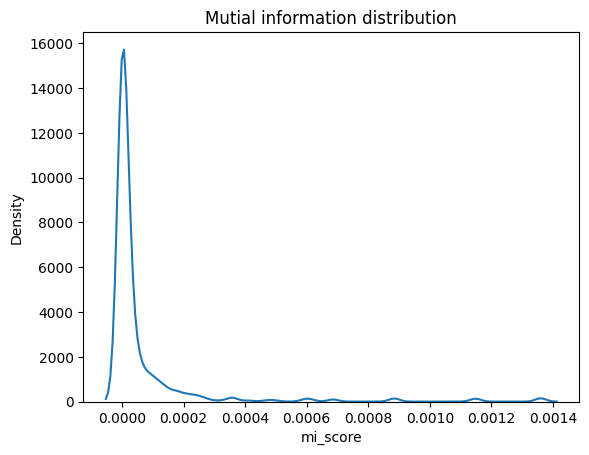

In [10]:
sns.kdeplot(data=df['mi_score'])
plt.title('Mutial information distribution');

In [11]:
sorted_df = df.sort_values(by='mi_score', ascending=False)

The 5 pairs with highest MI score:

In [12]:
sorted_df.head(5)

,sent_id,sent,masked_sent,ent1,label1,ent2,label2,mi_score
32526,906999,"Mulder confides that, during his ordeal, Scull...","[MASK] confides that, during his ordeal, [MASK...",Mulder,PERSON,Scully,PERSON,0.00136
24196,672836,Mulder persuades Scully not to visit Melissa a...,[MASK] persuades [MASK] not to visit Melissa a...,Mulder,PERSON,Scully,PERSON,0.00136
38820,1076633,"Later, Scully and Mulder meet Doggett, who has...","Later, [MASK] and [MASK] meet Doggett, who has...",Scully,PERSON,Mulder,PERSON,0.00136
29893,835244,"Mulder is a believer in the paranormal, while ...","[MASK] is a believer in the paranormal, while ...",Mulder,PERSON,Scully,PERSON,0.00136
29894,835272,Mulder finds medical records with Scully's nam...,[MASK] finds medical records with [MASK]'s nam...,Mulder,PERSON,Scully,PERSON,0.00136


The 5 pairs with lowest MI score:

In [13]:
sorted_df.tail(5)

,sent_id,sent,masked_sent,ent1,label1,ent2,label2,mi_score
62279,1721525,"To protect the girls' anonymity, Frances and E...","To protect the girls' anonymity, Frances and E...",Alice,PERSON,Wright,PERSON,5.765173e-09
78,3642,"At 33 years old, Stevens became the second-you...","At 33 years old, [MASK] became the second-youn...",Stevens,PERSON,Duke,ORG,5.765162e-09
65781,1818168,"Before the Court of Appeals, Treadwell and Mor...","Before the Court of Appeals, Treadwell and [MA...",Morrison,PERSON,Kelly,PERSON,5.765160e-09
56575,1565074,"In 1920, Crown Prince Yi Un of Korea married P...","In 1920, [MASK] Prince Yi Un of [MASK] married...",Crown,PRODUCT,Korea,GPE,5.765154e-09
16541,464614,Thousands of migratory birds took refuge on Be...,Thousands of migratory birds took refuge on [M...,Bermuda,GPE,Connecticut,GPE,5.765146e-09


### Exploring the MI for each labels-pair

I decided to display only the top 8 label pairs in the dataset for mutual information (MI) analysis. As expected, we often observe a power-law distribution, with an additional cluster representing the pairs that frequently appeared together.

In [14]:
def plot_type_mi_KDE_plot(df, type1, type2):
    df1 = df[( (df['label1'] == type1) & (df['label2'] == type2) ) | ( (df['label2'] == type1) & (df['label1'] == type2) )]
    sns.kdeplot(data=df1['mi_score'])
    plt.title(f'Mutial information distribution for labels: {type1}-{type2}')
    print(df1['mi_score'].describe())

count    3.995800e+04
mean     6.574475e-05
std      1.571880e-04
min      5.765146e-09
25%      1.348983e-06
50%      1.252977e-05
75%      6.484228e-05
max      1.148362e-03
Name: mi_score, dtype: float64


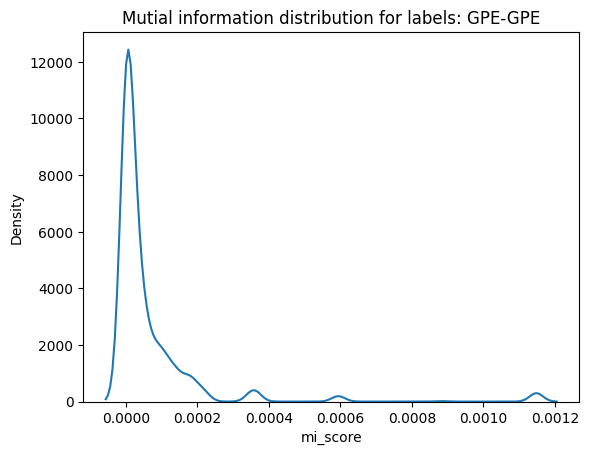

In [15]:
plot_type_mi_KDE_plot(df, 'GPE', 'GPE')

count    5.142000e+03
mean     2.231279e-05
std      5.193181e-05
min      5.769703e-09
25%      5.509574e-07
50%      3.213981e-06
75%      1.670851e-05
max      2.483481e-04
Name: mi_score, dtype: float64


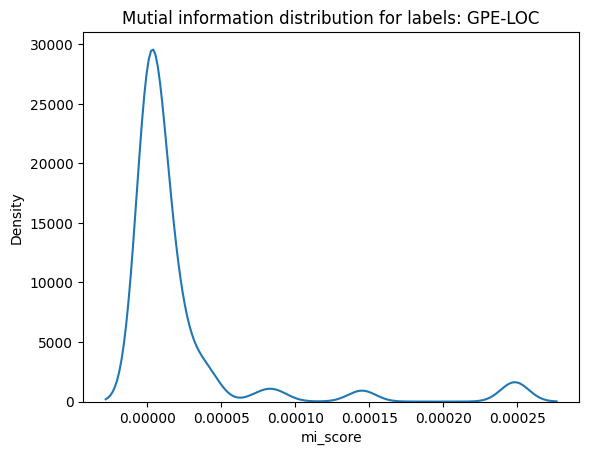

In [16]:
plot_type_mi_KDE_plot(df, 'GPE', 'LOC')

count    1.167900e+04
mean     6.038898e-05
std      1.921345e-04
min      5.767826e-09
25%      1.944499e-07
50%      1.344630e-06
75%      1.123333e-05
max      8.844001e-04
Name: mi_score, dtype: float64


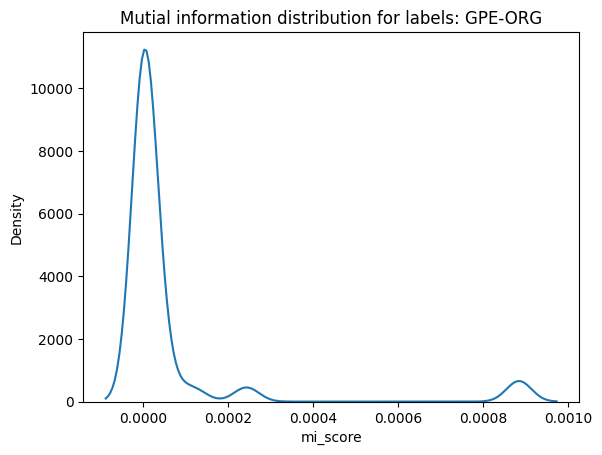

In [17]:
plot_type_mi_KDE_plot(df, 'GPE', 'ORG')

count    1.472700e+04
mean     6.596430e-06
std      1.635880e-05
min      5.766084e-09
25%      1.114896e-07
50%      5.955899e-07
75%      3.585799e-06
max      2.428699e-04
Name: mi_score, dtype: float64


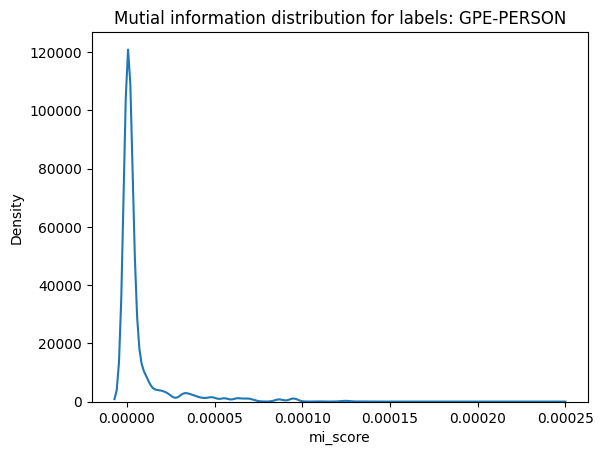

In [18]:
plot_type_mi_KDE_plot(df, 'GPE', 'PERSON')

count    1.497000e+03
mean     2.522211e-04
std      2.758098e-04
min      6.118546e-09
25%      2.605095e-05
50%      8.968744e-05
75%      6.854462e-04
max      6.854462e-04
Name: mi_score, dtype: float64


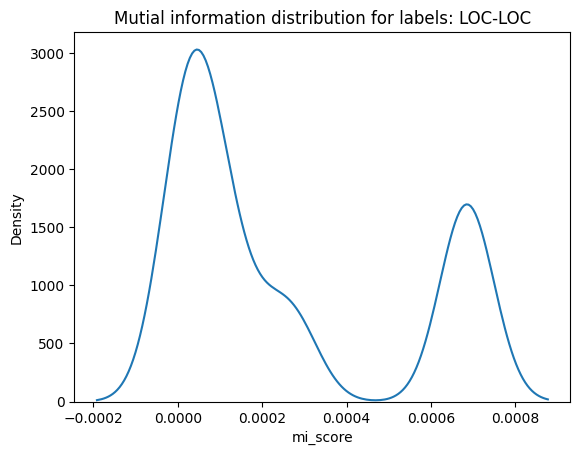

In [19]:
plot_type_mi_KDE_plot(df, 'LOC', 'LOC')

count    3.365000e+03
mean     3.994323e-05
std      6.176932e-05
min      5.765541e-09
25%      8.190038e-07
50%      9.964399e-06
75%      4.909909e-05
max      2.538557e-04
Name: mi_score, dtype: float64


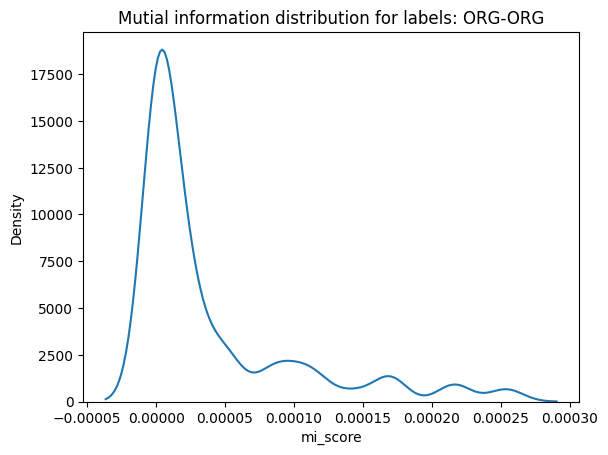

In [20]:
plot_type_mi_KDE_plot(df, 'ORG', 'ORG')

count    6.871000e+03
mean     1.418794e-05
std      3.882539e-05
min      5.765162e-09
25%      1.675104e-07
50%      1.729690e-06
75%      1.073240e-05
max      4.957274e-04
Name: mi_score, dtype: float64


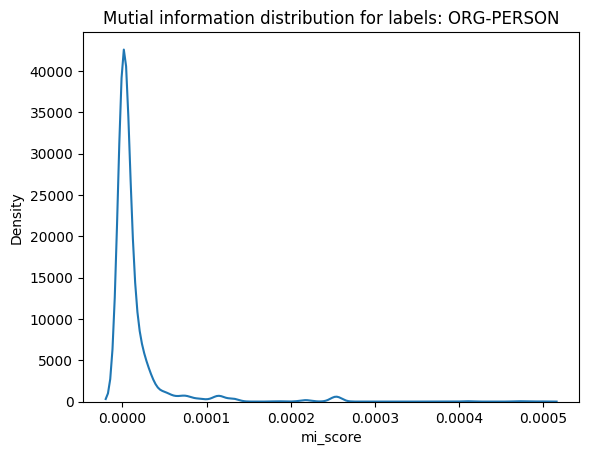

In [21]:
plot_type_mi_KDE_plot(df, 'ORG', 'PERSON')

count    1.023200e+04
mean     1.616235e-04
std      3.420471e-04
min      5.765160e-09
25%      7.027648e-07
50%      1.148049e-05
75%      1.312740e-04
max      1.359769e-03
Name: mi_score, dtype: float64


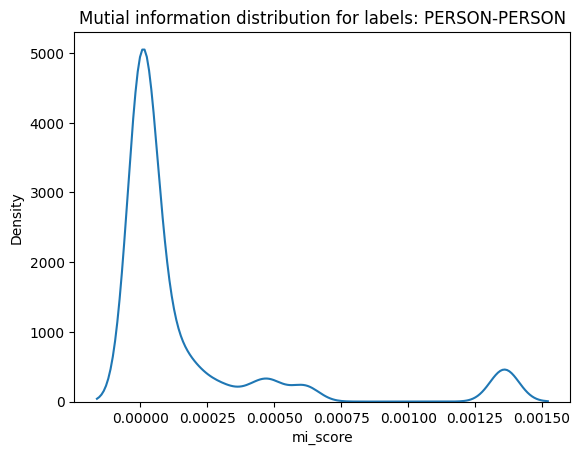

In [22]:
plot_type_mi_KDE_plot(df, 'PERSON', 'PERSON')